 # Laboratory 7: Solving partial differential equations using an explicit, finite difference method.
 ## Christopher Rodell
 ### EOSC 511

 ## Problem Two
 - a\) Find the CFL condition (in seconds) for 𝑑𝑡 for the Python example in Problem One. Test your value.
 $$
 d / d t>2 \sqrt{g H}
 $$
 $$
 \\
 $$
 Using the Stagered Grid.
 $$
 \begin{array}{l}{\frac{u_{i}(t+d t)-u_{i}(t-d t)}{2 d t}+g \frac{h_{i+1}(t)-h_{i}(t)}{d x}=0} \\ {\frac{h_{i}(t+d t)-h_{i}(t-d t)}{2 d t}+H \frac{u_{i}(t)-u_{i-1}(t)}{d x}=0}\end{array}
 $$

 **CR CFL calculation**
 $$
 {g = 980}    \hspace{2mm} cm * s^{-2} \hspace{10mm} {H = 1}    \hspace{2mm} cm \hspace{10mm} {dx = 1}    \hspace{2mm} cm
 $$
 $$
 d / d t>2 \sqrt{g H}
 $$
 $$
 \frac{dx}{2 \sqrt{g H}} > dt
 $$
 $$
 \\
 $$
 $$
 0.0159 s > dt
 $$
 **If dt is greater than 0.0159 the model becomes unstable and explodes. SEE PLOTS BELOW AS EXAMPLE dt = 0.018s**

******************************
context imported. Front of path:
/Users/rodell/repos/numeric_students/numeric_notebooks/lab7-cr
back of path: /Users/rodell/.ipython
******************************

through /Users/rodell/repos/numeric_students/numeric_notebooks/lab7-cr/context.py
midpoit 4
[-1.28822975e-231  0.00000000e+000  0.00000000e+000 -9.80000000e-003
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  5.38970828e+228] now of u
midpoit 4
[ 1.19460974e-04  0.00000000e+00  0.00000000e+00 -1.76400000e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.19460974e-04] now of u


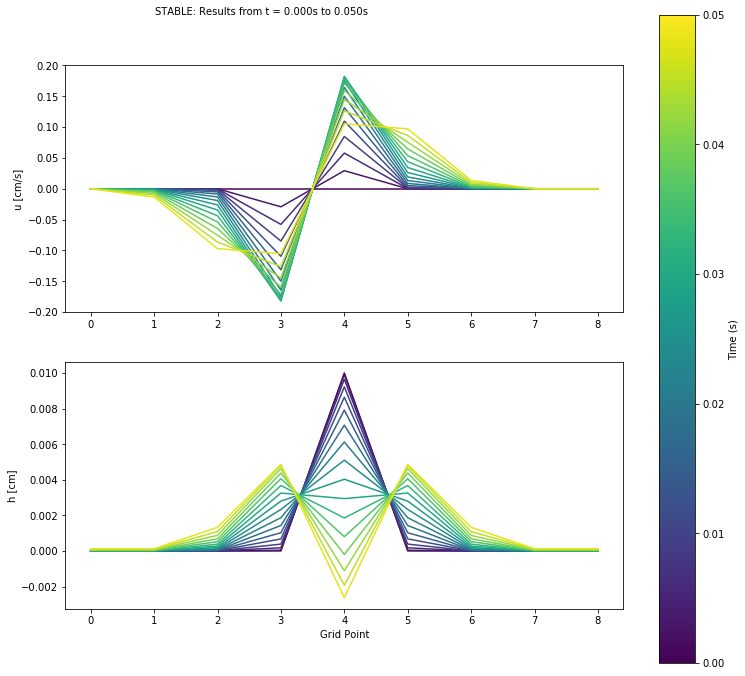

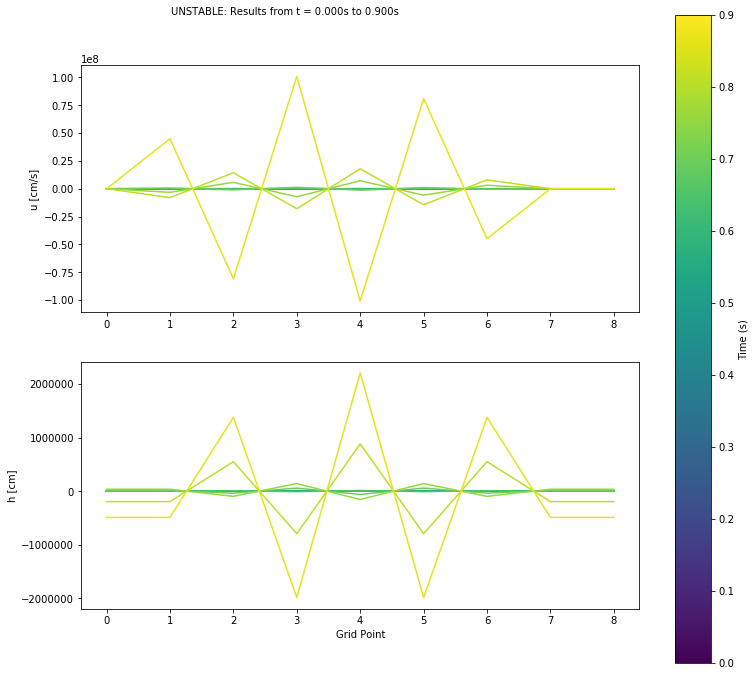

In [1]:
import context
import matplotlib.pyplot as plt
import numpy as np
import rain_cr_pro2

## Stable Case dt
rain_cr_pro2.rain([50,9, 0.001])

## Unstable Case dt
rain_cr_pro2.rain([50,9, 0.018])

plt.show()


 ## Problem Four
 Which grid gives the best accuracy for 𝑑=𝑅/2?
 Explain in what ways it is more accurate.
 $$
 \\
 $$
 **From the plot below we can see that grid 2 more accurately
 models the actual solution. The actual solution has a
 parabolic shape. Though grid 1 ane 2 are sinusoidal so
  you see the big difference on the boundary edges.
 Grid 2 has a higher wave amplitude allowing better
 representation of the actual solution.  grid 1
 (likely because grid one has cos + sin in the function
 damping the wave).**
 $$
 \\
 $$
 $$
 \omega^{2}=f^{2} \cos ^{2}\left(\frac{k d}{2}\right)+\frac{4 g H \sin ^{2}\left(\frac{k d}{2}\right)}{d^{2}} \hspace{10mm} \text{Grid 1}
 $$
 $$
 \\
 $$
 $$
 \omega^{2}=f^{2}+\frac{4 g H \sin ^{2}\left(\frac{k d}{2}\right)}{d^{2}} \hspace{10mm} \text{Grid 2}
 $$

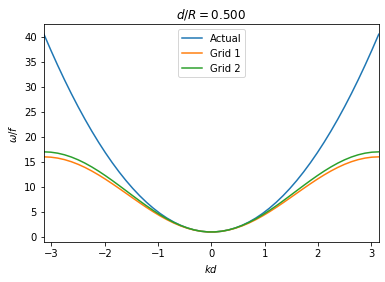

In [2]:
import accuracy2d
accuracy2d.main(0.5)



 ## Problem Five
 Modify rain.py to solve equations (No variation in y, first eqn),
 (No variation in y, second eqn) and (No variation in y, third eqn)
 on the most accurate grid.
 $$
 \frac{\partial u}{\partial t}-f v=-g \frac{\partial h}{\partial x} \hspace{10mm} (1)
 $$
 $$
 \\
 $$
 $$
 \frac{\partial v}{\partial t}+f u=0 \hspace{20mm} (2)
 $$
 $$
 \\
 $$
 $$
 \frac{\partial h}{\partial t}+H \frac{\partial u}{\partial x}=0 \hspace{16mm} (3)
 $$
 **Discritize using leapfrog method with a Stagared Gird 2**
 $$
 \frac{u_{i, j+1}-u_{i, j-1}}{2 d t}-f v_{i, j}+g \ \frac{h_{i+1, j}-h_{i, j}}{d x} = 0 \hspace{18mm} (1)
 $$
 $$
 \frac{v_{i, j+1}-v_{i, j-1}}{2 dt}+f u_{i, j}=0 \hspace{46mm} (2)
 $$
 $$
 \frac{h_{i, j+1}-h_{i, j-1}}{2 d t}+H \frac{u_{i, j}-u_{i-1, j}}{d x}=0 \hspace{30mm} (3)
 $$
 $$
 \\
 $$
 **Solve for u,v,h at time dt+1**
 $$
 \\
 $$
 $$
 u_{i, j+1}=2 d t\left(f v_{i, j}-g \frac{h_{i+1, j}-h_{i, j}}{d x}\right)+u_{i, j-1} \hspace{16mm} (1)
 $$
 $$
 v_{i, j+1}=v_{i, j-1}-2 f u_{i,j} dt \hspace{52mm} (2)
 $$
 $$
 h_{i, j+1}=h_{i, j-1}-2 H d t \frac{u_{i, j}-u_{i-1, j}}{d x} \hspace{34mm} (3)
 $$
 $$
 \\
 $$
 ** predictor-corrector**
 $$
 \begin{array}{c}h_{3}(0)=h_{0} \\ h_{3}(d t)=h_{3}(0)-h_{0} H g \frac{d t^{2}}{d x^{2}}\end{array}
 $$
 $$
 \\
 $$
 $$
 \begin{array}{l}u_{2}(d t)=fv_{2} -h_{0} g \frac{d t}{d x} \\ u_{3}(d t)=-u_{2}(d t)\end{array}
 $$
 $$
 \\
 $$
 $$
 \begin{aligned}
 &v_{2}(d t)=f u_{2} d t\\
 &v_{3}(d t)=-v_{2}d t
 \end{aligned}
 $$
 **SEE rian_cr_pro5.py**
 $$
 \\
 $$
 *Note the Coriolis frequency was defined by the equatin below at an latitude of 50 deg north*
 $$
 f=2 \Omega \sin \varphi
 $$
 $$
 \Omega = 7.2921 × 10−5 \hspace{2mm} (rad/s)
 $$

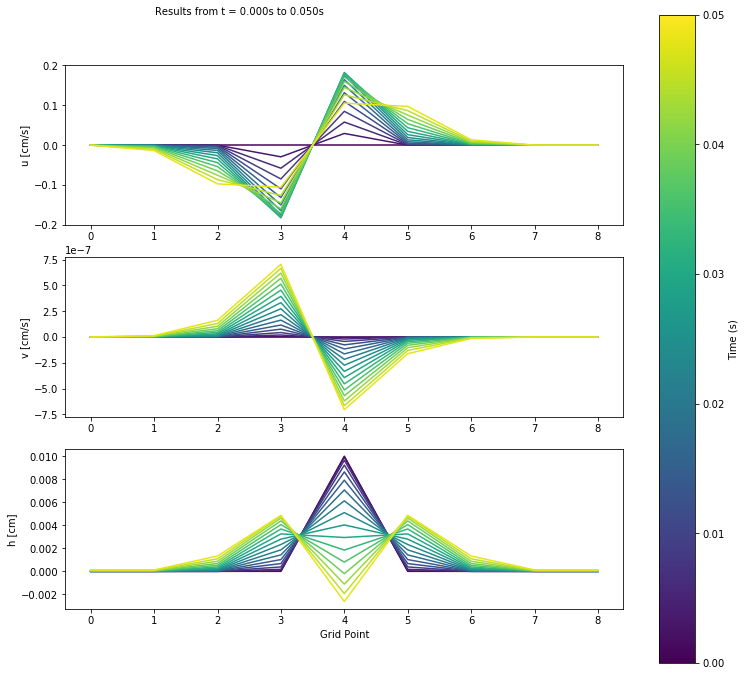

In [3]:
import rain_cr_pro5


rain_cr_pro5.rain([50,9])
plt.show()
